In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
# data= pd.read_excel('sBook1.xlsx', sheet_name='Sheet1')
# shuffled_data = data.sample(frac=1, random_state=42)
# shuffled_data.to_excel('sBook1.xlsx', index=False)

data = pd.read_csv('LSTM2.csv')

print(data.shape)
data.head(20)

(1018, 2)


,Book,Genre
0,১০০ টি সাইন্স এক্সপেরিমেন্ট,2.0
1,অঙ্কের যত সমস্যা,2.0
2,অঙ্কের যাদু,2.0
3,অনুভূতিতে গণিত ও বিজ্ঞান,2.0
4,অলিম্পিয়াড লড়তে হলে কতটা জানো পদার্থবিজ্ঞান - ...,2.0
5,অলিম্পিয়াড সমগ্র,2.0
6,অ্যান্টিম্যাটার,2.0
7,আধুনিক রসায়নের ইতিবৃত্ত,2.0
8,আন্তর্জাতিক গণিত অলিম্পিয়াড প্রশ্ন এবং উত্তর,2.0
9,আবিষ্কারের গল্প,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Book    1018 non-null   object 
 1   Genre   1018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


In [6]:
data['Book'].isnull().sum()
data.duplicated().sum()

8

In [7]:
data.describe()


,Genre
count,1018.000000
mean,1.478389
std,1.113970
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [8]:
data['Genre'].value_counts()
print(len(data))

1018


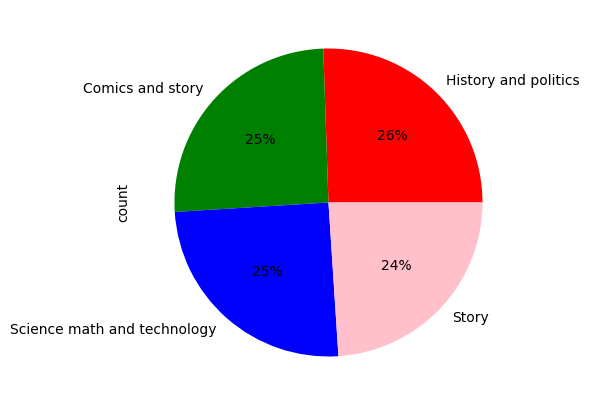

In [9]:
class_labels = ["History and politics", "Comics and story", "Science math and technology", "Story"]

data.Genre.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(5, 5), colors=["red", "green", "blue", "pink"], labels=class_labels)
plt.show()


In [10]:
lbl = preprocessing.LabelEncoder()
data['Genre']=lbl.fit_transform(data['Genre'])
data.Genre.value_counts()

Genre
0    260
2    259
1    255
3    244
Name: count, dtype: int64

In [11]:
book=data['Book'].copy()
gnr=data['Genre'].copy()

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(data['Book'], data['Genre'], test_size=0.2)

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
vocab_size = len(tokenizer.word_index) + 1

In [14]:
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

In [15]:
max_sequence_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [16]:
embedding_dim = 50
num_classes = len(data['Genre'].unique())

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 20
batch_size = 64
history = model.fit(train_sequences, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
12/12 [==============================] - 1s 25ms/step - loss: 1.3861 - accuracy: 0.2391 - val_loss: 1.3902 - val_accuracy: 0.2073
Epoch 2/20
12/12 [==============================] - 0s 17ms/step - loss: 1.3779 - accuracy: 0.3525 - val_loss: 1.3956 - val_accuracy: 0.2439
Epoch 3/20
12/12 [==============================] - 0s 16ms/step - loss: 1.3627 - accuracy: 0.4413 - val_loss: 1.3820 - val_accuracy: 0.3049
Epoch 4/20
12/12 [==============================] - 0s 17ms/step - loss: 1.3283 - accuracy: 0.5191 - val_loss: 1.3693 - val_accuracy: 0.2683
Epoch 5/20
12/12 [==============================] - 0s 27ms/step - loss: 1.2596 - accuracy: 0.4686 - val_loss: 1.3275 - val_accuracy: 0.3659
Epoch 6/20
12/12 [==============================] - 0s 17ms/step - loss: 1.1025 - accuracy: 0.6708 - val_loss: 1.2605 - val_accuracy: 0.4024
Epoch 7/20
12/12 [==============================] - 0s 17ms/step - loss: 0.8563 - accuracy: 0.7336 - val_loss: 1.0936 - val_accuracy: 0.5122
Epoch 8/20
12

In [19]:
accuracy = model.evaluate(test_sequences, test_labels)[1]
print(f'Test Accuracy: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.7500
Test Accuracy: 75.00%


In [ ]:
model.save(os.path.join('models','Lstm1.h5'))